In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from time import time
from IPython.display import display
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
%matplotlib inline

In [2]:
file = 'bank-additional-full.csv'
full_data = pd.read_csv(file, sep=';')

In [3]:
full_data.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
full_data.drop('nr.employed', axis =1, inplace= True)

In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
full_data['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [7]:
full_data.shape

(41188, 20)

In [8]:
full_data['y'].value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

In [9]:
# def preprocess_features(X):
# #function to preprocess
# # Initialize new output DataFrame
#     output = pd.DataFrame(index = X.index)
# # Investigate each feature column for the data
#     for col, col_data in X.iteritems():
# # If data type is non-numeric, replace all yes/no values with 1/0
#         if col_data.dtype == object:
#             col_data = col_data.replace(['yes', 'no','unknown'], [1, 0, np.nan])
# # If data type is categorical, convert to dummy variables
#         if col_data.dtype == object:
#             col_data = pd.get_dummies(col_data, prefix = col)
#         output = output.join(col_data)
#     return output
# full_data = preprocess_features(full_data)
# print("Processed feature columns ({} total features):\n{}".format(len(full_data.columns), list(full_data.columns)))

def preprocess_features(X):
    # Initialize new output DataFrame
    output = pd.DataFrame(index=X.index)
    
    # Investigate each feature column for the data
    for col, col_data in X.items():
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no', 'unknown'], [1, 0, np.nan])
        
        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)
        
        output = output.join(col_data)
    
    return output

full_data = preprocess_features(full_data)
print("Processed feature columns ({} total features):\n{}".format(len(full_data.columns), list(full_data.columns)))


Processed feature columns (54 total features):
['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'default', 'housing', 'loan', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'duration', 'campaign', 'pdays', 'previous', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y']


In [10]:
X_all = full_data.loc[:, full_data.columns != "y"]

In [11]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   job_admin.                     41188 non-null  bool   
 2   job_blue-collar                41188 non-null  bool   
 3   job_entrepreneur               41188 non-null  bool   
 4   job_housemaid                  41188 non-null  bool   
 5   job_management                 41188 non-null  bool   
 6   job_retired                    41188 non-null  bool   
 7   job_self-employed              41188 non-null  bool   
 8   job_services                   41188 non-null  bool   
 9   job_student                    41188 non-null  bool   
 10  job_technician                 41188 non-null  bool   
 11  job_unemployed                 41188 non-null  bool   
 12  marital_divorced               41188 non-null 

In [12]:
X_all.isnull().sum()

age                                 0
job_admin.                          0
job_blue-collar                     0
job_entrepreneur                    0
job_housemaid                       0
job_management                      0
job_retired                         0
job_self-employed                   0
job_services                        0
job_student                         0
job_technician                      0
job_unemployed                      0
marital_divorced                    0
marital_married                     0
marital_single                      0
education_basic.4y                  0
education_basic.6y                  0
education_basic.9y                  0
education_high.school               0
education_illiterate                0
education_professional.course       0
education_university.degree         0
default                          8597
housing                           990
loan                              990
contact_cellular                    0
contact_tele

In [13]:
print('%.2f%%' %((X_all['default'].isnull().sum()/X_all.shape[0])*100))

20.87%


In [14]:
X_all.fillna(X_all.median(),inplace=True)

X_all.isnull().sum()

C:\Users\SURYA KAIPU\AppData\Local\Temp\ipykernel_14084\79879347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all.fillna(X_all.median(),inplace=True)


age                              0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
marital_divorced                 0
marital_married                  0
marital_single                   0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university.degree      0
default                          0
housing                          0
loan                             0
contact_cellular                 0
contact_telephone                0
month_apr                        0
month_aug           

In [15]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   job_admin.                     41188 non-null  bool   
 2   job_blue-collar                41188 non-null  bool   
 3   job_entrepreneur               41188 non-null  bool   
 4   job_housemaid                  41188 non-null  bool   
 5   job_management                 41188 non-null  bool   
 6   job_retired                    41188 non-null  bool   
 7   job_self-employed              41188 non-null  bool   
 8   job_services                   41188 non-null  bool   
 9   job_student                    41188 non-null  bool   
 10  job_technician                 41188 non-null  bool   
 11  job_unemployed                 41188 non-null  bool   
 12  marital_divorced               41188 non-null 

In [16]:
from imblearn.over_sampling import SMOTE
import collections

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_all, full_data['y'])

print('Original dataset shape', collections.Counter(full_data['y']))
print('Resample dataset shape', collections.Counter(y_smote))

Original dataset shape Counter({0: 36548, 1: 4640})
Resample dataset shape Counter({0: 36548, 1: 36548})


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size = 0.15)

In [19]:
X_train.shape

(62131, 53)

In [20]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
# from sklearn.metrics import plot_roc_curve

lr=LogisticRegression(solver='lbfgs', max_iter=150)
dtc =  DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn =  KNeighborsClassifier()
xgb = XGBRFClassifier()
clf = [('dtc',dtc),('knn',knn),('rfc',rfc),('xgb',xgb),('lr',lr)] 


stack_model = StackingClassifier( estimators = clf,final_estimator = lr)

stack_model.fit(X_train, y_train)
y_pred=stack_model.predict(X_test)

from sklearn import metrics
print("Accuracy Using Stacking Classifier:",metrics.accuracy_score(y_test, y_pred)*100)
results = confusion_matrix(y_test,y_pred)
print ('\n\nSome detailed Analysis \nConfusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(y_test, y_pred)*100)
print('Classification Report : ')
print (classification_report(y_test, y_pred))

C:\Users\SURYA KAIPU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SURYA KAIPU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

Accuracy Using Stacking Classifier: 96.31554947560419


Some detailed Analysis 
Confusion Matrix :
[[5279  228]
 [ 176 5282]]
Accuracy Score : 96.31554947560419
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      5507
           1       0.96      0.97      0.96      5458

    accuracy                           0.96     10965
   macro avg       0.96      0.96      0.96     10965
weighted avg       0.96      0.96      0.96     10965



In [21]:
logreg = LogisticRegression().fit(X_train,y_train)
ypred_lg=logreg.predict(X_test)
print ('Accuracy Score Using Logistic Regression :',accuracy_score(y_test, ypred_lg)*100)
results = confusion_matrix(y_test,ypred_lg)
print(results)
print (classification_report(y_test, ypred_lg))

Accuracy Score Using Logistic Regression : 91.58230734154127
[[5012  495]
 [ 428 5030]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      5507
           1       0.91      0.92      0.92      5458

    accuracy                           0.92     10965
   macro avg       0.92      0.92      0.92     10965
weighted avg       0.92      0.92      0.92     10965



C:\Users\SURYA KAIPU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.tree import DecisionTreeClassifier
Dtree=DecisionTreeClassifier(criterion='gini', max_depth=10,random_state=121).fit(X_train,y_train)
ypred_dt=Dtree.predict(X_test)
print ('Accuracy Score using Decision Tree:',accuracy_score(y_test, ypred_dt)*100)
results = confusion_matrix(y_test,ypred_dt)
print(results)
print (classification_report(y_test, ypred_dt))

Accuracy Score using Decision Tree: 93.27861377108984
[[5098  409]
 [ 328 5130]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      5507
           1       0.93      0.94      0.93      5458

    accuracy                           0.93     10965
   macro avg       0.93      0.93      0.93     10965
weighted avg       0.93      0.93      0.93     10965



In [23]:
Rf=RandomForestClassifier(n_estimators=20, max_depth=8).fit(X_train,y_train)
ypred_rf=Rf.predict(X_test)
print ('Accuracy Score using Random Forest:',accuracy_score(y_test, ypred_rf)*100)
results = confusion_matrix(y_test,ypred_rf)
print(results)
print (classification_report(y_test, ypred_rf))

Accuracy Score using Random Forest: 92.63109895120839
[[4923  584]
 [ 224 5234]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5507
           1       0.90      0.96      0.93      5458

    accuracy                           0.93     10965
   macro avg       0.93      0.93      0.93     10965
weighted avg       0.93      0.93      0.93     10965



In [24]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=42,n_estimators=10)
xgb.fit(X_train,y_train)
ypred_xgb=xgb.predict(X_test)
print ('Accuracy Score using XGBoost:',accuracy_score(y_test, ypred_xgb)*100)
results = confusion_matrix(y_test,ypred_xgb)
print(results)
print (classification_report(y_test, ypred_xgb))

Accuracy Score using XGBoost: 93.9078887368901
[[5020  487]
 [ 181 5277]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5507
           1       0.92      0.97      0.94      5458

    accuracy                           0.94     10965
   macro avg       0.94      0.94      0.94     10965
weighted avg       0.94      0.94      0.94     10965



In [25]:
knn.fit(X_train,y_train)
ypred_knn=knn.predict(X_test)
print ('Accuracy Score using KNN:',accuracy_score(y_test, ypred_knn)*100)
print(confusion_matrix(y_test,ypred_xgb))

print (classification_report(y_test, ypred_xgb))

Accuracy Score using KNN: 93.00501595987231
[[5020  487]
 [ 181 5277]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5507
           1       0.92      0.97      0.94      5458

    accuracy                           0.94     10965
   macro avg       0.94      0.94      0.94     10965
weighted avg       0.94      0.94      0.94     10965



[2.20442819e-02 1.77328786e-02 1.76532089e-02 3.35250870e-03
 2.30935409e-03 5.33570739e-03 1.01835619e-02 3.34253736e-03
 7.31211557e-03 6.35721991e-03 1.16939015e-02 2.76459324e-03
 9.81687751e-03 3.22490523e-02 2.15975090e-02 8.41484186e-03
 5.27166989e-03 1.33261468e-02 2.24822190e-02 1.67133493e-04
 1.47206727e-02 3.21650540e-02 2.21437838e-07 2.13061131e-02
 8.68068780e-03 5.40165004e-02 3.02231964e-02 1.65515632e-02
 8.12347810e-03 1.42891887e-03 1.39864977e-02 1.96053702e-02
 1.28738074e-02 1.96866408e-02 8.68661096e-03 9.57229960e-03
 5.87346352e-03 1.86733908e-02 1.80457738e-02 1.92175504e-02
 2.03109862e-02 2.06573912e-02 1.22437420e-01 1.58709040e-02
 2.54961889e-02 4.66242266e-03 1.37554038e-02 1.56816572e-02
 2.67240012e-02 5.48344504e-02 2.08064060e-02 2.07580654e-02
 8.11595726e-02]


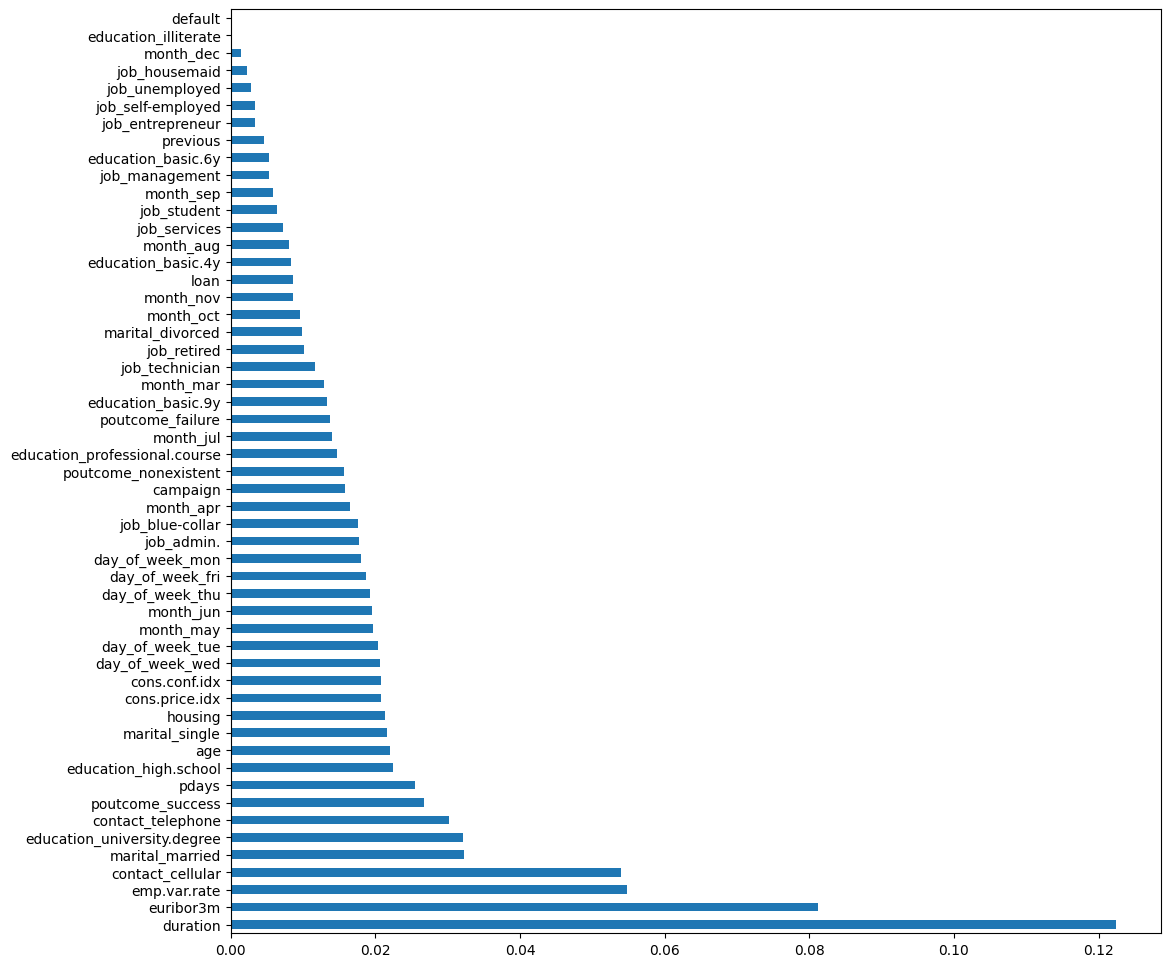

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)


print(model.feature_importances_)
plt.figure(figsize=(12,12))
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(55).plot(kind='barh')
plt.show()


In [27]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
model= pickle.load(open('model.pkl','rb'))
x=model.predict([[41,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1575,1,999,0,0,1,0,1.1,93.994,-36.4,4.857]])
y=model.predict([[41,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,15,1,999,0,0,1,0,1.1,93.994,-36.4,4.857]])

if 1 in x:
    print("x - client will subscibe")
else:
    print("x - client will not subscibe")

if 1 in y:
    print("y - client will subscibe")
else:
    print("y - client will not subscibe")

x - client will subscibe
y - client will not subscibe


C:\Users\SURYA KAIPU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\SURYA KAIPU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
